In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize





In [8]:
data = pd.read_csv('data.csv')


stop = stopwords.words('english')
x = data.description
y = data.points

In [7]:
corpus = []
IGNORE = False
for i in range(len(x)):
    if IGNORE == False:
        review = x[i].split(" ")
        review = [word for word in review if word not in stop]
        review = ' '.join(review)
        corpus.append(review)
    else:
        review = [i].split(" ")
        review = [word for word in review]
        review = ' '.join(review)
        corpus.append(review)    


In [4]:
df = pd.DataFrame({"Description": corpus, "Points":y})

df

,Description,Points
0,This tremendous 100% varietal wine hails Oakvi...,96
1,"Ripe aromas fig, blackberry cassis softened sw...",96
2,Mac Watson honors memory wine made mother trem...,96
3,"This spent 20 months 30% new French oak, incor...",96
4,"This top wine La Bégude, named highest point v...",95
...,...,...
150925,Many people feel Fiano represents southern Ita...,91
150926,"Offers intriguing nose ginger, lime floral ele...",91
150927,This classic example comes cru vineyard called...,91
150928,"A perfect salmon shade, scents peaches, cherri...",90


In [6]:
bins = [80, 84, 90, 94, 100]
labels = [1, 2, 3, 4]


df['Points_Class'] = pd.cut(df['Points'], bins=bins, labels=labels, include_lowest=True)

df

,Description,Points,Points_Class
0,This tremendous 100% varietal wine hails Oakvi...,96,4
1,"Ripe aromas fig, blackberry cassis softened sw...",96,4
2,Mac Watson honors memory wine made mother trem...,96,4
3,"This spent 20 months 30% new French oak, incor...",96,4
4,"This top wine La Bégude, named highest point v...",95,4
...,...,...,...
150925,Many people feel Fiano represents southern Ita...,91,3
150926,"Offers intriguing nose ginger, lime floral ele...",91,3
150927,This classic example comes cru vineyard called...,91,3
150928,"A perfect salmon shade, scents peaches, cherri...",90,2


In [7]:
p1=len(df[df['Points_Class'] == 1])/len(df)
p2=len(df[df['Points_Class'] == 2])/len(df)
p3=len(df[df['Points_Class'] == 3])/len(df)
p4=len(df[df['Points_Class'] == 4])/len(df)

print(p1)
print(p2)
print(p3)
print(p4)


0.1536937653216723
0.6327171536473862
0.19383820314052871
0.019750877890412775


In [8]:
def create_binary_bag_of_words(documents):
    vocabulary = set()
    binary_bow = []

    # build vocabulary
    for doc in documents:
        words = doc.split()
        for word in words:
            vocabulary.add(word)

    # create binary bag of words
    for doc in documents:
        binary_vector = []
        words = doc.split()
        for word in vocabulary:
            if word in words:
                binary_vector.append(1)
            else:
                binary_vector.append(0)
        binary_bow.append(binary_vector)

    return binary_bow, list(vocabulary)

In [9]:
df2 = pd.DataFrame({"Text": corpus, "Points":df["Points_Class"]})


In [10]:
df2

,Text,Points
0,This tremendous 100% varietal wine hails Oakvi...,4
1,"Ripe aromas fig, blackberry cassis softened sw...",4
2,Mac Watson honors memory wine made mother trem...,4
3,"This spent 20 months 30% new French oak, incor...",4
4,"This top wine La Bégude, named highest point v...",4
...,...,...
150925,Many people feel Fiano represents southern Ita...,3
150926,"Offers intriguing nose ginger, lime floral ele...",3
150927,This classic example comes cru vineyard called...,3
150928,"A perfect salmon shade, scents peaches, cherri...",2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df2["Text"], df2["Points"], test_size=0.2, random_state=651694207)

In [12]:
binary_bag_train, vocabulary_train = create_binary_bag_of_words(X_train)
X_train = binary_bag_train

In [13]:
len(X_test)

30186

In [14]:
one = np.count_nonzero(y_train == 1) / len(y_train)
two = np.count_nonzero(y_train == 2) / len(y_train)
three = np.count_nonzero(y_train == 3) / len(y_train)
four = np.count_nonzero(y_train == 4) / len(y_train)

print(one, two, three, four)

0.15319187702908632 0.6324869144636587 0.19485026171072684 0.019470946796528193


In [15]:
V_size = len(vocabulary_train)
V_size

70988

In [16]:
total_one_words = 0
total_two_words = 0
total_three_words = 0
total_four_words = 0


for i in range(len(X_train)):
    if y_train.iloc[i] == 1:
        for number in X_train[i]:
            total_one_words += number
    elif y_train.iloc[i] == 2:
        for number in X_train[i]:
            total_two_words += number
    elif y_train.iloc[i] == 3:
        for number in X_train[i]:
            total_three_words += number
    elif y_train.iloc[i] == 4:
        for number in X_train[i]:
            total_four_words += number

print(total_one_words)
print(total_two_words)
print(total_three_words)
print(total_four_words)

369700
1954313
717135
81954


In [17]:
one_prob = {}
two_prob = {}
three_prob = {}
four_prob = {}

for i in range(len(X_train)):
    if y_train.iloc[i] == 1:
        # print("one")
        for j in range(len(X_train[i])):
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 2/(total_one_words+(1*V_size))
                else:
                    one_prob[vocabulary_train[j]] = one_prob[vocabulary_train[j]] + 1/(total_one_words+(1*V_size))
                
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 1/(total_two_words+(1*V_size))
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 1/(total_three_words+(1*V_size))
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 1/(total_four_words+(1*V_size))
                

    elif y_train.iloc[i] == 2:
        for j in range(len(X_train[i])):
            # print("two")
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 2/(total_two_words+(1*V_size))
                else:
                    two_prob[vocabulary_train[j]] = two_prob[vocabulary_train[j]] + 1/(total_two_words+(1*V_size))
                
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 1/(total_one_words+(1*V_size))
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 1/(total_three_words+(1*V_size))
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 1/(total_four_words+(1*V_size))

    elif y_train.iloc[i] == 3:
        for j in range(len(X_train[i])):
            # print("three")
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 2/(total_three_words+(1*V_size))
                else:
                    three_prob[vocabulary_train[j]] = three_prob[vocabulary_train[j]] + 1/(total_three_words+(1*V_size))
                
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 1/(total_one_words+(1*V_size))
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 1/(total_two_words+(1*V_size))
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 1/(total_four_words+(1*V_size))

    else:
        for j in range(len(X_train[i])):
            # print("four")
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 2/(total_four_words+(1*V_size))
                else:
                    four_prob[vocabulary_train[j]] = four_prob[vocabulary_train[j]] + 1/(total_four_words+(1*V_size))
                
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 1/(total_one_words+(1*V_size))
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 1/(total_two_words+(1*V_size))
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 1/(total_three_words+(1*V_size))


In [18]:
test_df = pd.DataFrame({"Text": X_test, "Points":y_test}).reset_index()
predictions = []
for row in test_df['Text']:
    one_x = np.log(one)
    two_x = np.log(two)
    three_x = np.log(three)
    four_x = np.log(four)

    # pos = Prob_pos
    # neg = Prob_neg
    for word in row.split():
        if word in vocabulary_train:
            one_x += np.log(one_prob[word])
            two_x += np.log(two_prob[word])
            three_x += np.log(three_prob[word])
            four_x += np.log(four_prob[word])
            # pos *= pos_prob[word]
            # neg *= neg_prob[word]
    if max(one_x, two_x, three_x, four_x) == one_x:
        predictions.append(1)
    elif max(one_x, two_x, three_x, four_x) == two_x:
        predictions.append(2)
    elif max(one_x, two_x, three_x, four_x) == three_x:
        predictions.append(3)
    elif max(one_x, two_x, three_x, four_x) == four_x:
        predictions.append(4)


In [19]:
def create_metrics(actual, predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if actual[i] == 3:
            if actual[i] == predicted[i]:
                TP += 1
            else:
                FN += 1
        else:
            if actual[i] == predicted[i]:
                TN += 1
            else:
                FP += 1
    recall = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    negative_predictive_value = TN/(TN+FN)
    accuracy = (TP+TN)/(TN+TP+FP+FN)
    F_score= 2*((recall*precision)/(recall+precision))

    return TP, TN, FP, FN, recall, specificity, precision, negative_predictive_value, accuracy, F_score

In [20]:
def predict(sentence):
    onex = np.log(one)
    twox = np.log(two)
    threex = np.log(three)
    fourx = np.log(four)

    for word in sentence.split():
        if word in vocabulary_train:
            onex += np.log(one_prob[word])
            twox += np.log(two_prob[word])
            threex += np.log(three_prob[word])
            fourx += np.log(four_prob[word])
    return onex, twox ,threex, fourx


In [21]:
TP, TN, FP, FN, recall, specificity, precision, negative_predictive_value, accuracy, F_score = create_metrics(test_df['Points'], predictions)

In [22]:


print(f'Number of true positives: {TP}')
print(f'Number of true negatives: {TN}')
print(f'Number of false positives: {FP}')
print(f'Number of false negatives: {FN}')
print(f'Sensitivity (recall): {recall}')
print(f'Specificity: {specificity}')
print(f'Precision: {precision}')
print(f'Negative predictive value: {negative_predictive_value}')
print(f'Accuracy: {accuracy}')
print(f'F-score: {F_score}')


Number of true positives: 4005
Number of true negatives: 18862
Number of false positives: 5595
Number of false negatives: 1724
Sensitivity (recall): 0.6990748821783906
Specificity: 0.7712311403688106
Precision: 0.4171875
Negative predictive value: 0.9162537646944525
Accuracy: 0.7575366063738157
F-score: 0.5225389784069411


In [23]:
S = input('Enter your sentence: ')
print(f'Sentence S: \n{S}')




Sentence S: 
best


In [24]:
onex, twox ,threex, fourx = predict(S)


if onex > twox and onex > threex and onex > fourx:
    classification = 'Class 1 (Least)'
elif twox > onex and twox > threex and twox > fourx:
    classification = 'Class 2 (Lower Mid)'
elif threex > onex and threex > twox and threex > fourx:
    classification = 'Class 3 (Upper Mid)'
elif fourx > onex and fourx > twox and fourx > threex:
    classification = 'Class 4 (Most)'

print(f'Was classified as {classification}.')
print(f'P(Class 1 | S) = {np.e**onex}')
print(f'P(Class 2 | S) = {np.e**twox}')
print(f'P(Class 3 | S) = {np.e**threex}')
print(f'P(Class 4 | S) = {np.e**fourx}')

Was classified as Class 2 (Lower Mid).
P(Class 1 | S) = 6.952396118300753e-05
P(Class 2 | S) = 0.0004778079797172984
P(Class 3 | S) = 0.00027863194570896594
P(Class 4 | S) = 2.2151827114827206e-05


In [57]:
test_df[test_df['Points']==4]

,index,Text,Points
6,52269,"Although Cab quite tannic, really good now. Sh...",4
8,74064,"A brilliant Chardonnay, displaying terroir fin...",4
48,10775,Kracher always produces blend range TBAs. This...,4
89,26666,"A wonderfully drinkable beerenauslese, makes s...",4
108,28611,"All Cabernet Champoux, Klipsun, Palengat Wallu...",4
...,...,...,...
29798,106784,"94-96 Barrel sample. Firm tannins, wine packed...",4
29819,150562,"As unevolved are, dense multilayered aromas fl...",4
29950,92450,"With majority Chardonnay blend, turned wonderf...",4
29972,90727,There's grace purity Pinot Noir make particula...,4


In [41]:
predictions_array = np.array(predictions)  # Convert to NumPy array

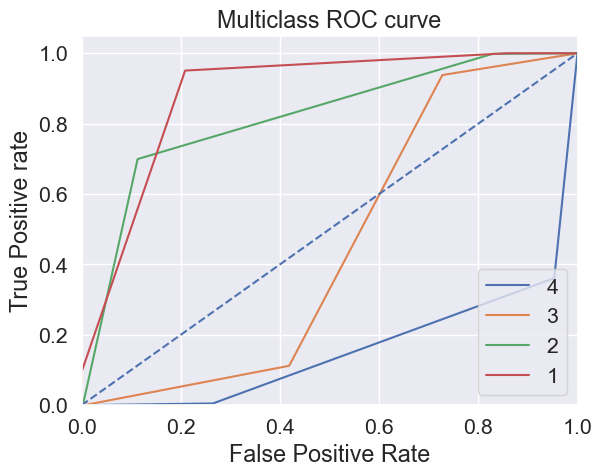

In [64]:


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = y_test_binarized.shape[1]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])
 
    plt.plot(fpr[i], tpr[i])


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(labels)
plt.show()

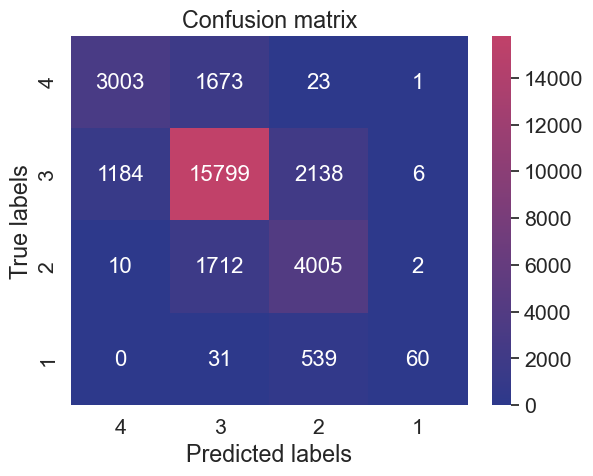

In [55]:
labels = [4,3,2,1]

cm = confusion_matrix(test_df['Points'], predictions)

cmap = LinearSegmentedColormap.from_list('custom_cmap', ["#2D398B", "#C14169"])

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap=cmap, fmt='d', xticklabels=labels, yticklabels=labels)


fig = plt.gcf()
fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


In [68]:

running=True

while running:
    S = input('Enter your sentence: ')
    print(f'Sentence S: \n{S}')
    onex, twox ,threex, fourx = predict(S)
    if onex > twox and onex > threex and onex > fourx:
        classification = 'Class 1 (Least)'
    elif twox > onex and twox > threex and twox > fourx:
        classification = 'Class 2 (Lower Mid)'
    elif threex > onex and threex > twox and threex > fourx:
        classification = 'Class 3 (Upper Mid)'
    elif fourx > onex and fourx > twox and fourx > threex:
        classification = 'Class 4 (Most)'

    print(f'Was classified as {classification}.')
    print(f'P(Class 1 | S) = {np.e**onex}')
    print(f'P(Class 2 | S) = {np.e**twox}')
    print(f'P(Class 3 | S) = {np.e**threex}')
    print(f'P(Class 4 | S) = {np.e**fourx}')

    run = input('Do you want to continue? (Y/N): ')
    if run != 'Y' and run != 'y':
        running = False
        break


Sentence S: 
delicious amazing
Was classified as Class 3 (Upper Mid).
P(Class 1 | S) = 8.755808748268453e-11
P(Class 2 | S) = 8.767878470624676e-09
P(Class 3 | S) = 3.72046890242346e-08
P(Class 4 | S) = 5.806009630197126e-09
Sentence S: 
tannic really good
Was classified as Class 2 (Lower Mid).
P(Class 1 | S) = 3.4794304786597073e-10
P(Class 2 | S) = 1.1096517238978998e-09
P(Class 3 | S) = 2.406463638893382e-10
P(Class 4 | S) = 1.848635037643533e-12
Sentence S: 
brilliant
Was classified as Class 3 (Upper Mid).
P(Class 1 | S) = 3.1285782532353394e-06
P(Class 2 | S) = 3.185386531448564e-05
P(Class 3 | S) = 3.6096063951649784e-05
P(Class 4 | S) = 5.092374049385571e-06
Sentence S: 
brilliant really good amazing delicious the best wine ever to be produced
Was classified as Class 3 (Upper Mid).
P(Class 1 | S) = 6.394273207524132e-35
P(Class 2 | S) = 5.94855866983566e-32
P(Class 3 | S) = 6.0898521810721125e-30
P(Class 4 | S) = 8.423556983796045e-32
